In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
df.describe()

,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
count,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.506229,58.731429,8.259046e+06,6928.857143,301.869894,255.845714,6.985951,263.702857,3.188571
std,2.179778,150.118122,9.005483e+06,23910.324134,975.961738,1295.501112,15.510840,763.627371,3.029337
min,0.000000,1.000000,7.763158e+05,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.643274e+06,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000
50%,0.000000,6.000000,6.299805e+06,0.000000,-1.000000,-1.000000,0.000000,0.000000,2.000000
75%,0.050000,30.000000,9.374432e+06,555.500000,12.254464,0.000000,2.531250,24.500000,4.000000
max,21.900000,1111.000000,8.588051e+07,143000.000000,5567.955357,11400.000000,69.312500,4633.000000,13.000000


In [4]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,4.602523,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,1.395774,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,0.024739,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,-0.232905,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,0.323790,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532


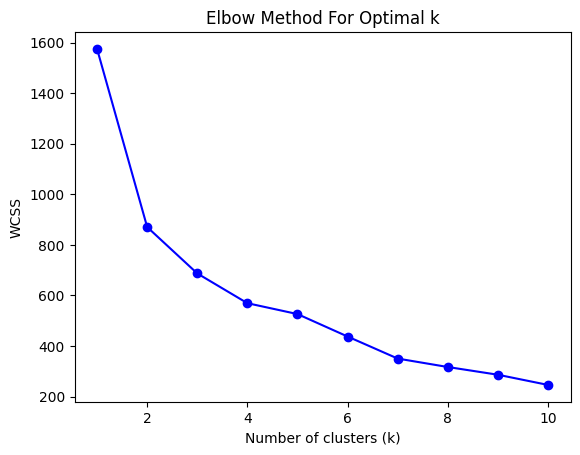

In [5]:
wcss = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])

df['kmeans_4'] = kmeans.labels_

In [7]:
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T,kmeans_4
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,4.602523,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045,2
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,1.395774,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045,2
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,0.024739,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730,0
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,-0.232905,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835,0
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,0.323790,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1


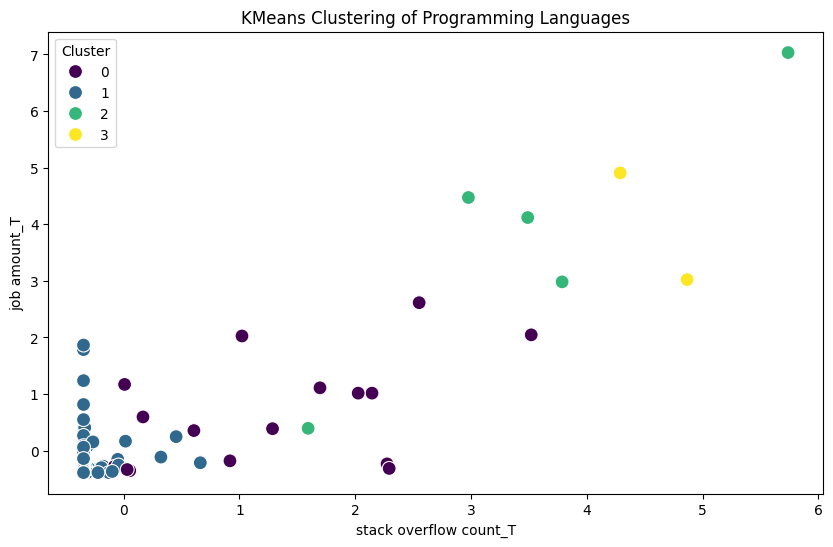

In [8]:
# Example: Using two features for a 2D scatter plot (you can choose others)
feature_x = 'stack overflow count_T'  # X-axis feature
feature_y = 'job amount_T'           # Y-axis feature

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='kmeans_4', palette='viridis', s=100)

# Add plot labels and title
plt.title('KMeans Clustering of Programming Languages')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

# Show the plot
plt.legend(title='Cluster')
plt.show()


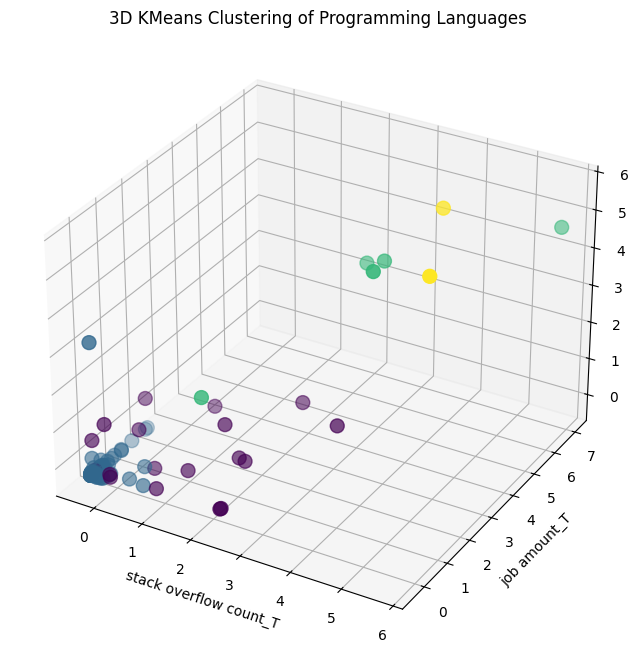

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Example: Using three features for a 3D scatter plot
feature_x = 'stack overflow count_T'  # X-axis feature
feature_y = 'job amount_T'
feature_z = 'linkedin skill_T'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df[feature_x], df[feature_y], df[feature_z], c=df['kmeans_4'], cmap='viridis', s=100)

# Add labels and title
ax.set_title('3D KMeans Clustering of Programming Languages')
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)

# Show the plot
plt.show()


In [10]:
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    df[f'KMeans_{i}'] = kmeans.labels_

In [11]:
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,...,average search count_T,stack overflow count_T,location_count_T,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,...,1.367345,2.977634,2.917045,2,0,1,1,2,2,2
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,...,0.549330,5.738184,2.917045,2,0,1,1,2,2,2
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,...,1.940589,0.918385,0.930730,0,0,0,2,3,4,1
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,...,-0.281385,2.552126,1.592835,0,0,0,2,3,3,3
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,...,1.269206,3.786625,2.585993,2,0,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,...,-0.451684,-0.346320,-0.724532,1,0,0,0,0,0,0
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,...,0.929762,-0.346320,-0.724532,1,0,0,0,0,0,0
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,...,-0.451684,-0.346320,-0.724532,1,0,0,0,0,0,0
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,...,-0.451684,-0.346320,-0.724532,1,0,0,0,0,0,0


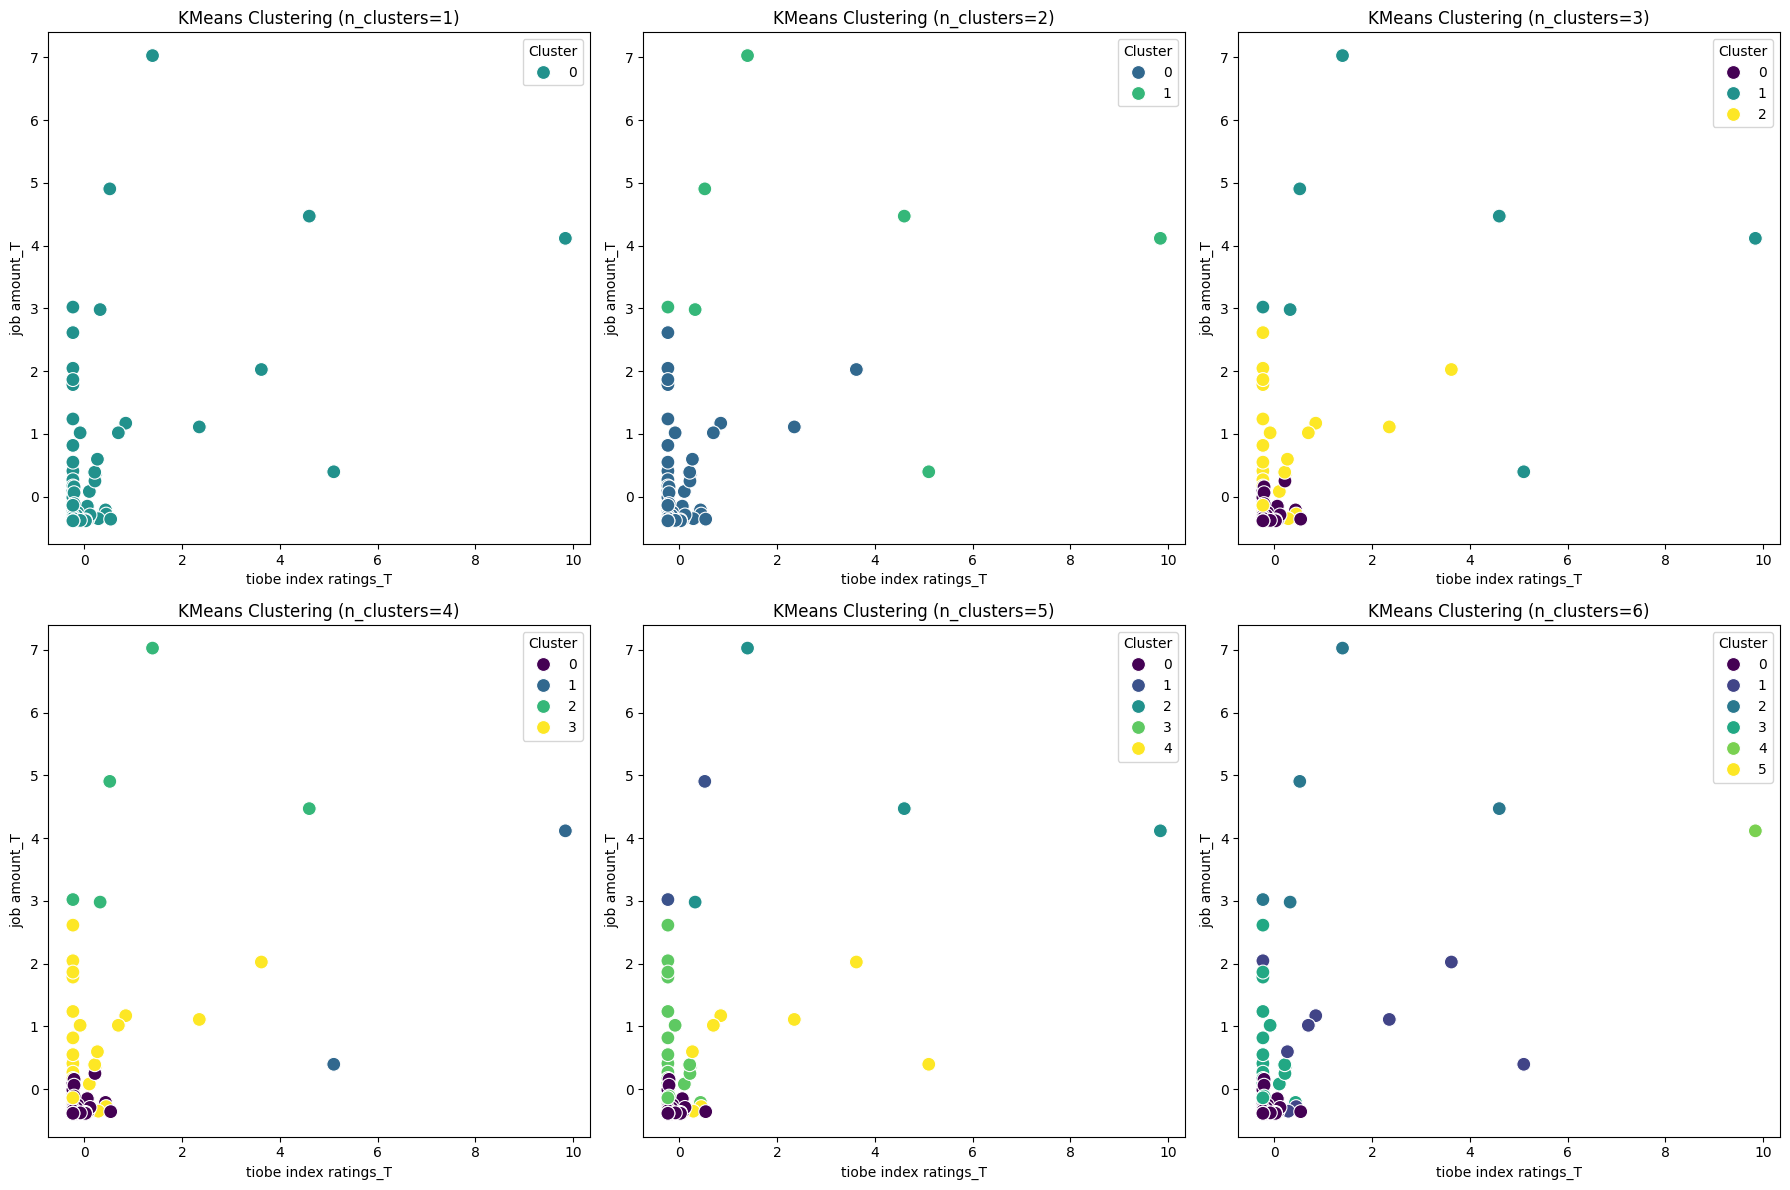

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns of subplots
axes = axes.ravel()

for i in range(1,7):
    feature_x = 'tiobe index ratings_T'
    feature_y = 'job amount_T'
    
    # Create scatter plot for the current subplot
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue=f'KMeans_{i}', 
                    palette='viridis', ax=axes[i-1], s=100)
    
    # Add plot labels and title for each subplot
    axes[i-1].set_title(f'KMeans Clustering (n_clusters={i})')
    axes[i-1].set_xlabel(feature_x)
    axes[i-1].set_ylabel(feature_y)
    axes[i-1].legend(title='Cluster')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

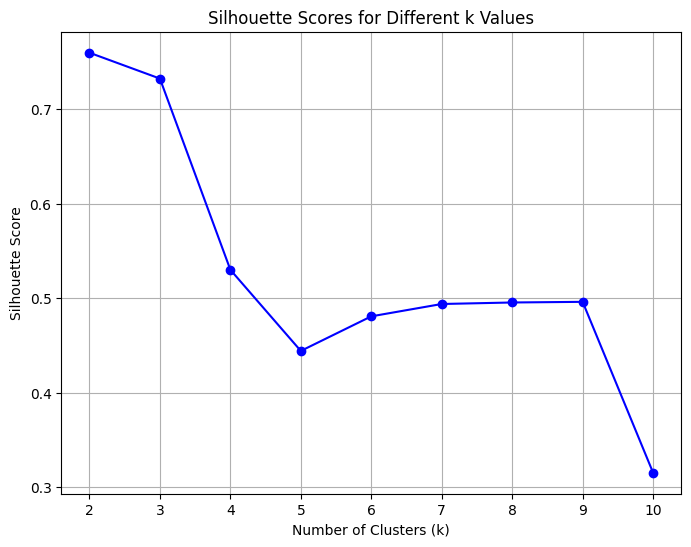

The best number of clusters (k) is: 2


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of k values to try (e.g., from 2 to 10 clusters)
k_range = range(2, 11)  # You can change this range based on your preference

# List to store silhouette scores for each k
silhouette_scores = []

# Loop through each k value and calculate the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    
    # Calculate the silhouette score for the current k
    score = silhouette_score(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                                 'linkedin skill_T', 'avg wiki views (monthly)_T', 
                                 'github user count_T', 'average search count_T', 
                                 'stack overflow count_T', 'location_count_T']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Output the k with the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters (k) is: {best_k}")


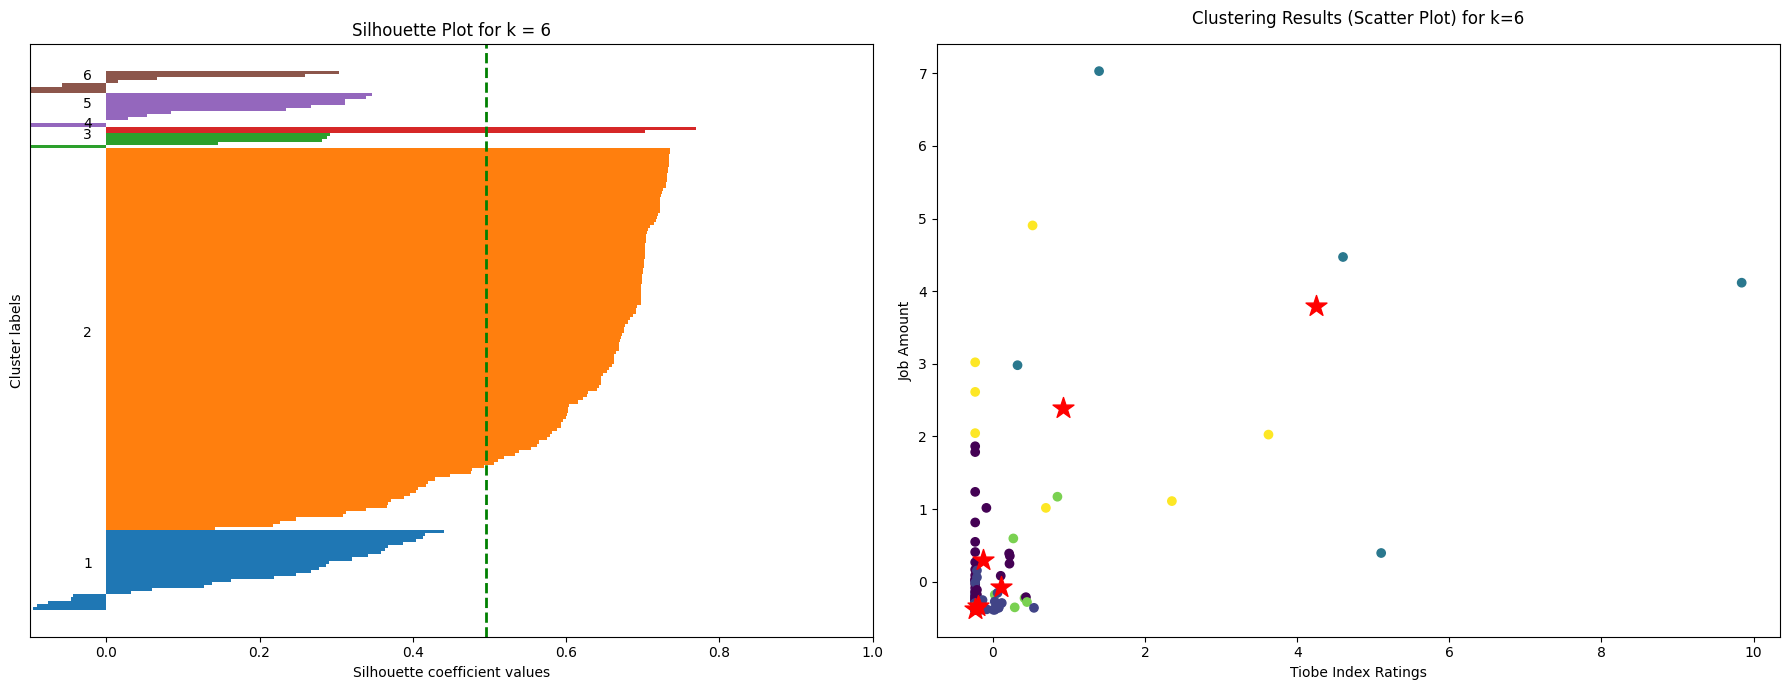

In [32]:
from sklearn.metrics import silhouette_samples
import numpy as np

k_range = range(2, 7)  
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    
    silhouette_vals = silhouette_samples(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                                             'linkedin skill_T', 'avg wiki views (monthly)_T', 
                                             'github user count_T', 'average search count_T', 
                                             'stack overflow count_T', 'location_count_T']], kmeans.labels_)
    
    y_lower = 0
    y_upper = 0
    ax[0].cla() 
    
    for i, cluster in enumerate(np.unique(kmeans.labels_)):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        # Plot silhouette values as a horizontal bar plot
        ax[0].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax[0].text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
    
    # Calculate and plot the average silhouette score
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score, linestyle='--', linewidth=2, color='green')
    
    # Set labels and title for silhouette plot
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title(f'Silhouette Plot for k = {k}')
    
    # Scatter plot of the data colored by the cluster labels
    ax[1].cla()  # Clear the previous scatter plot for new k
    ax[1].scatter(df['tiobe index ratings_T'], df['job amount_T'], c=kmeans.labels_, cmap='viridis')
    
    # Plot the centroids of the clusters
    centroids = kmeans.cluster_centers_
    ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    
    # Set labels and title for the scatter plot
    ax[1].set_xlabel('Tiobe Index Ratings')
    ax[1].set_ylabel('Job Amount')
    ax[1].set_title(f'Clustering Results (Scatter Plot) for k={k}', y=1.02)
    
    # Adjust layout for better spacing
    plt.tight_layout()

    # # Save the plot for the current k
    plt.savefig(f'Silhouette_analysis_k_{k}.jpg')

    # Show all the plots at once after the loop
plt.show()
